# Sparks foundation


# Task 1-Prediction using supervised ML 

By, Vedang Sawant

Prediction of percentage obtained by student based on number of hours he/she studied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("student_scores.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are 25 observation for Hours & Scores variable each.So, we can conclude that there is no missing value in our data.

In [4]:
data.shape

(25, 2)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a strong positive linear relationship between Scores & Hours.

In [7]:
x = data.drop(['Scores'],axis=1)
y = data['Scores']

Scores is dependent variable and Hours is independent variable.

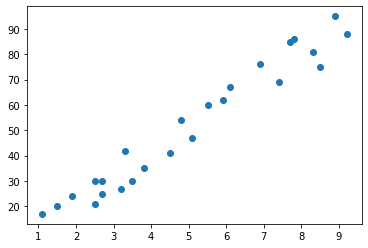

In [8]:
plt.scatter(x,y);

From scatterplot, we can see there is a linear relationship between Scores & Hours.So,we can use linear regression to predict the score.

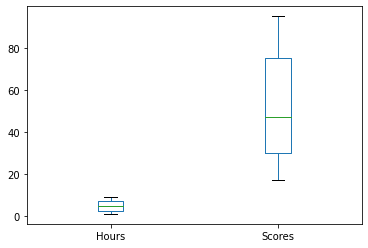

In [9]:
data.plot(kind='box');

There are no ouliers present in our data.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression as LR
lr=LR()

model=lr.fit(x_train,y_train)

In [12]:
print("model coefficient is:",model.coef_)

model coefficient is: [9.78856669]


In [13]:
print("model intercept is:",model.intercept_)

model intercept is: 2.370815382341881


In [14]:
y_predict=model.predict(x_test)
print("predicted values are:",y_predict)

predicted values are: [17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [15]:
hours_new=[9.25]
percentage=model.predict([hours_new])
print("pedicted score is ",percentage)


pedicted score is  [92.91505723]


If a student studies for 9.25 hours/day then he/she will score 92.91% in examination.

In [16]:
print("coefficient of determination is:",model.score(x_test,y_test))


coefficient of determination is: 0.9568211104435257


Accuracy of our model is approx 95%

''

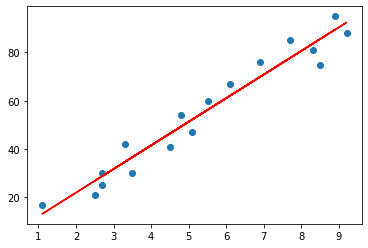

In [17]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')
;

Since we can see from above plot points are near to fitted line.We can say our model is best fit for trained data.

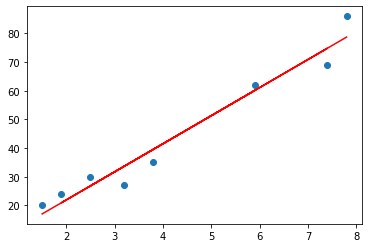

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color='red');

Since we can see from above plot points are near to fitted line.We can say our model is best fit for tested data.

In [19]:
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : y_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']

In [20]:
print(residuals)

    fitted values  predicted values  residuals
5              20         17.053665   2.946335
2              27         33.694229  -6.694229
19             69         74.806209  -5.806209
16             30         26.842232   3.157768
11             62         60.123359   1.876641
22             35         39.567369  -4.567369
17             24         20.969092   3.030908
24             86         78.721636   7.278364


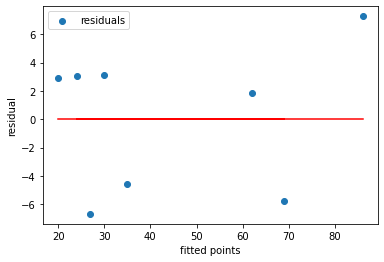

In [21]:
f = [20,27,69,30,62,35,24,86]
plt.scatter(f,residuals.residuals,label='residuals')
k = [0 for i in [20,27,69,30,62,35,24,86]]
plt.plot(f,k,color='red')
plt.xlabel("fitted points")
plt.ylabel('residual')
plt.legend();

From above residual vs fitted plot we can see homoschedasticity is satisfied i.e variance of error terms is nearly constant

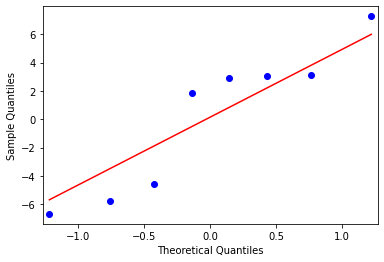

In [22]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals.residuals, line = 's' );

Errors are normally distributed